# Machine Learning Classification Tutorial
### William Thyer, 2023

"The use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyze and draw inferences from patterns in data."


# Classification
A type of predictive modelling problem where a label is predicted for a given example of data. E.g. classifying flower species from petal and sepal width. 
![Alt text](images/iris.png)
![Alt text](images/petal_sepal.png)

In [1]:
import numpy as np # linear algebra (matrices etc.)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # figures
import matplotlib.pyplot as plt # figures

from sklearn import datasets

In [236]:
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.4)

In [129]:
iris = datasets.load_iris()

In [149]:
species = np.array(iris['target_names'])[np.array(iris['target'])]
df = pd.DataFrame(iris['data'][:,:2],columns=iris['feature_names'][:2])
df['species'] = species
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),species,target
0,5.1,3.5,setosa,0
1,4.9,3.0,setosa,0
2,4.7,3.2,setosa,0
3,4.6,3.1,setosa,0
4,5.0,3.6,setosa,0


<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

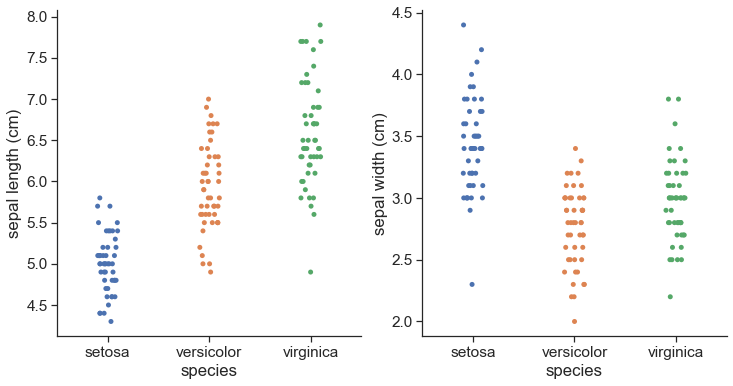

In [237]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
sns.stripplot(x='species',y='sepal length (cm)',data=df,ax=axes[0])
sns.stripplot(x='species',y='sepal width (cm)',data=df,ax=axes[1])

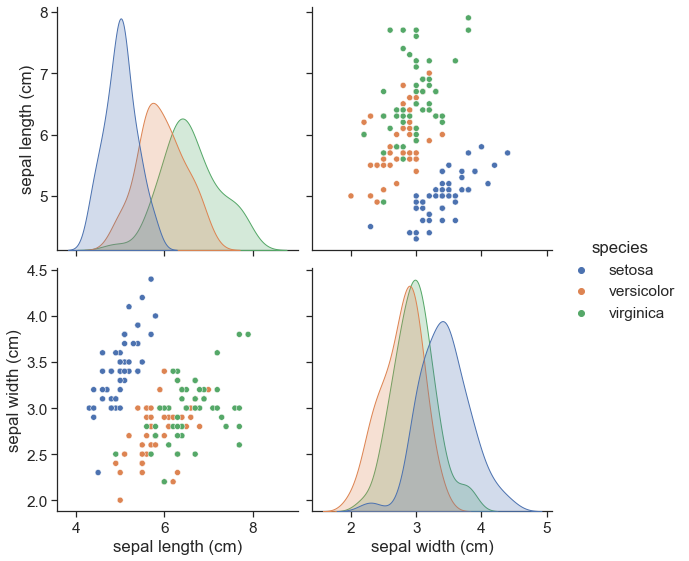

In [243]:
sns.pairplot(df, hue='species', vars = ['sepal length (cm)','sepal width (cm)'],height=4)

# Our first model
We'll use logistic regression, which is a very simple linear classification model.

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
x = df.drop(['species','target'],axis=1).to_numpy()
y = df['target']

In sklearn, it's as easy as calling model.fit().

In [214]:
model = LogisticRegression(max_iter=1000)
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [250]:
preds = model.predict(x)
print(preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [251]:
df['acc'] = preds == df['target']

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

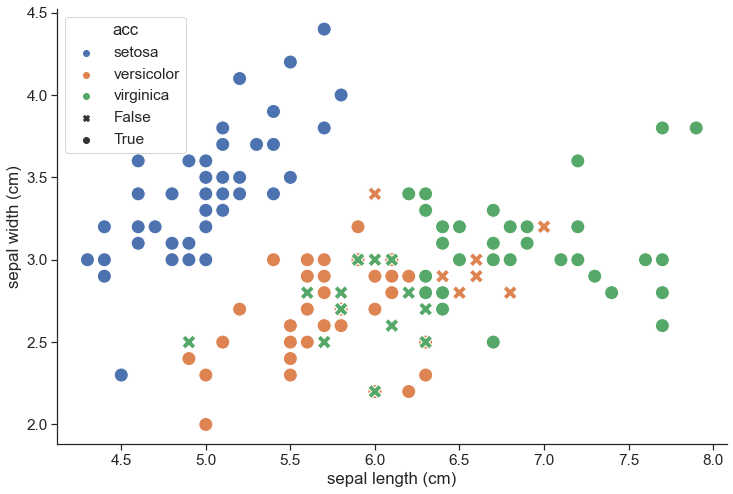

In [252]:
plt.subplots(figsize=(12,8))
markers = {True: "o", False : "X"}

sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue=species,style='acc',data=df,markers=markers,s=200)

In [253]:
model.score(x,y)

0.82

We did it! Our first model. Are there any problems?

# Train/test split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
train, test = train_test_split(df, test_size = 0.35, random_state = 1)

In [161]:
print(train.shape)
print(test.shape)

(97, 4)
(53, 4)


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

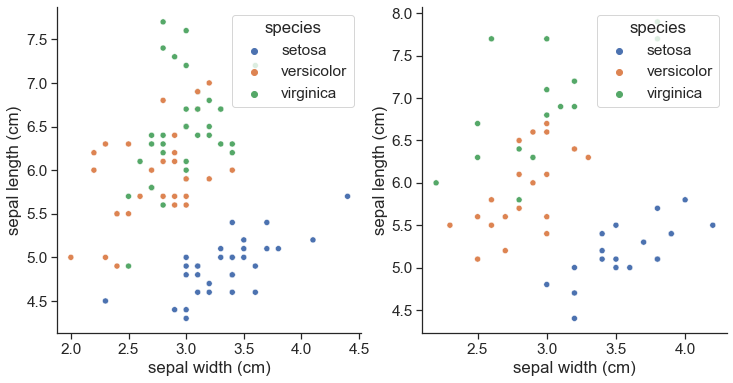

In [267]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x='sepal width (cm)',y='sepal length (cm)',hue='species',hue_order=['setosa','versicolor','virginica'],data=train,ax=axes[0])
sns.scatterplot(x='sepal width (cm)',y='sepal length (cm)',hue='species',hue_order=['setosa','versicolor','virginica'],data=test,ax=axes[1])

# Our real first model

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

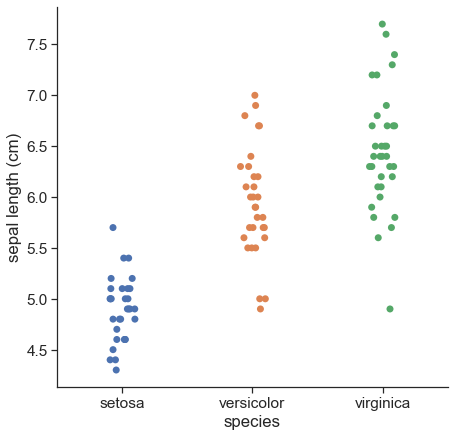

In [258]:
fig,ax = plt.subplots(figsize=(7,7))
sns.stripplot(x='species',y='sepal length (cm)',data=train,ax=ax, order=['setosa','versicolor','virginica'],s=7)

In [163]:
def deep_ai_neural_engine_classifier(x):
    preds = []
    for x_sample in x:
        if x_sample < 5.4:
            preds.append(0)
        elif x_sample > 6:
            preds.append(2)
        else:
            preds.append(1)
    return np.array(preds)

In [164]:
x_train_simple = train['sepal length (cm)']
y_train = train['target']
preds = deep_ai_neural_engine_classifier(x_train_simple)

In [165]:
np.mean(preds == y_train)

0.7422680412371134

In [167]:
x_test_simple = test['sepal length (cm)']
y_test = test['target']
preds = deep_ai_neural_engine_classifier(x_test_simple)

In [168]:
np.mean(preds == y_test)

0.6415094339622641

# Logistic Regression

In [270]:
x_train = train.drop(['species','target'],axis=1)
x_test = test.drop(['species','target'],axis=1)

In [271]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8113207547169812

# Standardization

In [272]:
x_train['sepal width (cm)'] *= 10000
x_test['sepal width (cm)'] *= 10000

In [273]:
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.2830188679245283

In [274]:
from sklearn.preprocessing import StandardScaler

In [275]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [276]:
x_test = scaler.transform(x_test)

In [277]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.8113207547169812